# 3i005 - projet 3 - 2019fev -
# Analyse de séquences génomiques

In [191]:
# to allow autoreload of projet.py
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import Projet_Bioinfo as projet
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


L’objectif de ce projet est d’utiliser des méthodes d’analyse statistiques pour extraire de l’information des données génétiques. Un génome peut être vu en première approximation comme une suite de lettre (une sorte de livre), composé de différents éléments qui sont "lus" par la cellule pour lui permettre d’accomplir ses tâches. Nous verrons comment nous pouvons par l’analyse statistique de la séquence génomique (un texte) localiser ou détecter ces éléments. <br>
_Rendu du projet_: <br>
• un compte rendu sous format notebook.<br>
• le code du projet dûment commenté. <br>
• nous n'avons pas fait 3I019 (Introduction à la bioinformatique)

## Partie 1 Rappels de biologie

Les objets que nous étudions sont des génomes d’organismes vivant. En première approximation, un génome peut être vu comme une chaîne de caractère écrite dans un alphabet à 4 lettres (A, C, G ou T). Depuis le début des années 90, il est devenu de plus en plus simple de séquencer un génome (le séquençage d’un génome humain coûte à l’heure actuelle un peu moins de 1000$). Cependant on ne peut pas comprendre, simplement à partir de la séquence génomique, comment cette information est utilisée par la cellule. C’est un peu comme avoir a disposition un manuel d’instructions écrit dans une langue inconnue. On doit donc décrypter un code pour comprendre le rôle des différents éléments qui sont présents le long de ce génome1. <br>
 Dans la suite nous ne considérerons que des exemples sur des organismes unicellulaire, dont les génomes sont plus compactes et dont l’analyse statistique est plus simple. Comme première approximation, on peut distinguer deux types d’éléments d’intérêt le long des génomes, les gènes et les séquences promoteurs. L’organisation de ces éléments le long de la séquence est rappelé ci dessous (pour plus d’information vous pouvez aller sur wikipedia et lire quelques pages de biologie moléculaire).

## Partie 2 : Préliminaires : données et lecture des fichiers

### Question 1
Combien de nucléotides compte les chromosomes de S. cerevisae qui sont donnés ?

In [192]:
dictSequences = projet.read_fasta("./sequences/yeast_s_cerevisae_genomic_chr1-4.fna")
nbS0 = [0, 0, 0, 0]
nbIter = 0
for i in dictSequences.keys():
    count = projet.nucleotide_count(dictSequences[i])
    print("Répartition nucléotides:",count)
    print("nombre de nucléotides total pour le chromosome %d:"%nbIter, sum(count))
    print("\n")
    for i in range(len(nbS)):
        nbS0[i] += count[i]
    nbIter += 1

print("Nucleotide count total =" ,nbS0)
print("nombre de nucléotides total pour s_cerevisae:",sum(nbS0))

Répartition nucléotides: [59043, 41019, 41611, 58814]
nombre de nucléotides total pour le chromosome 0: 200487


Répartition nucléotides: [212499, 144544, 142052, 214569]
nombre de nucléotides total pour le chromosome 1: 713664


Répartition nucléotides: [82833, 57146, 54745, 80982]
nombre de nucléotides total pour le chromosome 2: 275706


Répartition nucléotides: [399967, 263234, 264755, 398040]
nombre de nucléotides total pour le chromosome 3: 1325996


Nucleotide count total = [754342, 505943, 503163, 752405]
nombre de nucléotides total pour s_cerevisae: 2515853


TEST DE LECTURE DES AUTRES FICHIERS

In [17]:
dictSequences = projet.read_fasta("regulatory_seq_PHO.fasta")
nbS = [0, 0, 0, 0]
for i in dictSequences.keys():
    count = projet.nucleotide_count(dictSequences[i])
    print(count)
    for i in range(len(nbS)):
        nbS[i] += count[i]

print("Nucleotide count total =" ,nbS)

[255, 160, 158, 227]
[267, 162, 198, 173]
[289, 145, 139, 227]
[251, 145, 145, 259]
[269, 182, 136, 213]
Nucleotide count total = [1331, 794, 776, 1099]


In [99]:
dictSequences2 = projet.read_fasta("./sequences/regulatory_seqs_GAL.fasta")
nbS2 = [0, 0, 0, 0]
for i in dictSequences2.keys():
    count = projet.nucleotide_count(dictSequences2[i])
    print(count)
    for i in range(len(nbS)):
        nbS2[i] += count[i]

print("Nucleotide count total =" ,nbS2)

[262, 169, 123, 246]
800
[256, 154, 163, 227]
800
[248, 180, 134, 238]
800
[260, 135, 156, 249]
800
[242, 131, 160, 267]
800
[200, 200, 149, 251]
800
[240, 159, 162, 247]
808
Nucleotide count total = [1708, 1128, 1047, 1725]


In [103]:
dictSequences3 = projet.read_fasta("./sequences/regulatory_seqs_MET.fasta")
nbS3 = [0, 0, 0, 0]
for i in dictSequences3.keys():
    count = projet.nucleotide_count(dictSequences3[i])
    print(count)
    for i in range(len(nbS)):
        nbS3[i] += count[i]

print("Nucleotide count total =" ,nbS3)

[244, 149, 124, 283]
[261, 154, 128, 257]
[288, 138, 132, 242]
[253, 166, 139, 242]
[276, 150, 130, 244]
[262, 143, 201, 194]
[234, 178, 140, 248]
[240, 147, 174, 239]
[238, 151, 144, 267]
Nucleotide count total = [2296, 1376, 1312, 2216]


On voit que chaque séquence est dotée de 800 nucléotides. (longueur du génome)

### Question 2
La fonction nucleotide_frequency(liste_entiers) renvoie les fréquences d’apparition de chaque lettre dans un tuple. Ceci correspond à un modèle aléatoire de génomes où les occurrences successives des lettres sont indépendantes et identiquement distribuées (comme les tirages d’un dé à quatre face).Appliquer cette fonction pour estimer les fréquences des lettres sur le génome de S. cerevisae.

In [4]:
for i in dictSequences.keys():
    frequency = projet.nucleotide_frequency(dictSequences[i])
    print(frequency)

[0.31875 0.2     0.1975  0.28375]
[0.33375 0.2025  0.2475  0.21625]
[0.36125 0.18125 0.17375 0.28375]
[0.31375 0.18125 0.18125 0.32375]
[0.33625 0.2275  0.17    0.26625]


### Question 3
Ecrire une fonction logproba(liste_entiers, m) qui calcule la log-probabilité d’une séquence étant donné les fréquences des lettres m. Par exemple avec un modèle m=(0.2,0.3,0.1,0.4) la fonction appliquée à la séquence "CAT" renvoie log(0.3 ∗ 0.2 ∗ 0.4) = log(0.3) + log(0.2) + log(0.4) ≈ −3.7297 (Note : On demande de calculer des log-probabilités car les probabilités décroissent exponentiellement vite avec la longueur de la séquence, ce qui amène rapidement à des erreurs d’arrondi). Pour utiliser la fonction log, vous devez importer le module math.

In [5]:
print(projet.logproba((projet.encode_sequence('CAT')), (0.2,0.3,0.1,0.4)))

key = '>PHO8\tPHO8; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001136.8:1420243:1421042:R\n'
projet.logproba(dictSequences[key], (0.2,0.3,0.1,0.4))

-3.7297014486341915


-1239.1936619477563

### Question 4
Faire une version optimisée de logprobafast qui prend en premier paramètre le résultat de compte_lettres.

In [6]:
projet.logprobafast(projet.nucleotide_count(projet.encode_sequence('CAT')), (0.2,0.3,0.1,0.4))

-3.7297014486341915

## Partie 3 Annotation des régions promoteurs

### 3.1 Description Empirique, préliminaires

1. Compter tous les mots d’une taille k dans un génome. On va ranger tous ces mots dans un tableau de taille $4^k$ , rangés en ordre lexicographique : AA..A= 0, ..., TT..T=$4^k−1$. <br> (a) Ecrire une fonction `code(m, k)` qui renvoie pour un mot m de taille k son indice dans le tableau ordonné lexicographiquement. Aide : l’indice correspond à l’écriture du mot en base 4 : <br> TAC= 3 × $4^2$ + 0 × $4^1$ + 1 × $4^0$ = 49 (on a codé T=3, A=0 et C = 1)

In [75]:
#LE MOT DOIT ETRE ENCODE AVANT UTILISATION
projet.code(projet.encode_sequence('TAC'), 3)

49

(b) Ecrire la fonction inverse qui, connaissant un indice i et la longueur du mot k
renvoie la séquence de longueur k correspondante. Aide : vous pouvez utiliser
les fonctions de la division euclidienne "//" et "%" (10//3 = 3 et 10%3 = 1).

In [80]:
#Dans le code , on peut le decoder ou le renvoyer directement sous la forme encodée
#Exemple avec 'TAC' = [3,0,1]
projet.inverse(49,3)

[3, 0, 1]

(c) Ecrire la fonction qui compte le nombre d’occurrences pour tous les mots de
taille k dans une séquence d’ADN. On comptera les occurences chevauchantes,
par exemple pour k = 2 la séquence ATCAT a comme comptages AT=2, CA=1,
TC=1.

Nous avons codé deux versions de compte_occurences_chevauchantes.
<br>
La 1ère retourne un dictionnaire et est plus lisible. Elle nécessite cependant d'avoir la séquence sous format `string` et est moins utile pour la suite.
<br>
La deuxième est moins lisible , on retourne une liste où les indices de la liste représentent les mots de longueur k et leurs valeurs correspond à l'occurence dans la séquence. Nous allons utiliser celle-ci pour la suite afin de l'appliquer sur les génomes et comparer les occurences attendues et les occurences chevauchantes.

In [83]:
projet.compte_occurences_chevauchantes("ATCAT",2)

{'AT': 2, 'TC': 1, 'CA': 1}

In [82]:
projet.compte_occurences_chevauchantes2(projet.encode_sequence("ATCAT"),2)

[0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [84]:
#TEST sur une séquence du génome PHO chargé précédemment
projet.compte_occurences_chevauchantes2(dictSequences[key],2)

[87, 50, 78, 52, 67, 19, 42, 33, 59, 57, 43, 39, 54, 36, 35, 48]

On observe donc 87 AA , 50 AC , 78 AG , etc ...

2. Si on connait les fréquences des lettres dans le génome, quel est le nombre attendu d’occurrences pour un mot w dans une séquence de longueur l ? Ecrire une fonction `comptage_attendu` qui prend en paramètres les fréquences des nucléotides, k, et la longueur du génome l et renvoie les comptages attendus pour tous les mots de longueur k.

Si on connait les fréquences des lettres dans le génome , on déduit sa probabilité d'apparition en multipliant les fréquences de ses lettres.(Car l'apparition d'un nucléotide est supposée indépendante des autres nucléotides)
<br> Par exemple $P(AAAA)= P(A)^4$ , $P(AAAC)=P(A)^3 * P(C) $
<br>
Une fois la probabilité d'apparition du mot déterminée , nous multiplions cela par la longueur du génome découpé en k parties qui est $l/k$. Puisque nous considérons les occurences chevauchantes , il faut alors prendre en compte les découpages du génome en $l-j/k$ où j={1,...,k-1}

In [97]:
#exemple d'execution

m = (0.2,0.3,0.1,0.4) # fréquence des nucléotides
comptage_attendu_k2 = projet.comptage_attendu(m, 2 , 800)
print(comptage_attendu_k2)

{'AA': 33, 'AC': 48, 'AG': 17, 'AT': 65, 'CA': 48, 'CC': 72, 'CG': 24, 'CT': 97, 'GA': 17, 'GC': 24, 'GG': 9, 'GT': 33, 'TA': 65, 'TC': 97, 'TG': 33}


De façon similaire à comptage_occurences_chevauchantes , nous avons codé une version qui est sous la forme d'un tableau et qui est moins "lisible" mais plus pratique/plus facile à manipuler.

In [157]:
comptage_attendu_v2_k2 = projet.comptage_attendu2(m, 2, 800)
print(comptage_attendu_v2_k2)

[31.960000000000008, 47.94, 15.980000000000004, 63.920000000000016, 47.94, 71.91, 23.97, 95.88, 15.980000000000004, 23.97, 7.990000000000002, 31.960000000000008, 63.920000000000016, 95.88, 31.960000000000008, 127.84000000000003]


3. Afficher avec un graphique 2D le nombre attendu d’occurrences sur l’axe des abscisses et le nombre observé sur l’axe des ordonnées pour tout les mots de longueur k pour les séquences PHO, GAL et MET. On testera avec k = 2, 4, 6, 8.Pour évaluer si un mot a un comptage attendu différent de son comptage observé vous pouvez les triez par rapport à l’enrichissement relatif (i.e. la droite y = x sur le graphique 2D).

Pour k = 2 , on constate que le comptage attendu est proche du comptage observé.

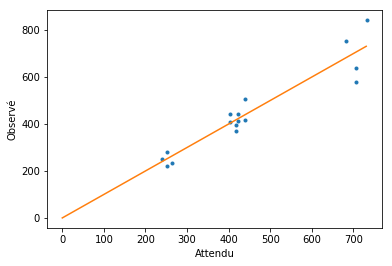

In [146]:
projet.graphe_Attendu_Observe("./sequences/regulatory_seqs_MET.fasta",2)

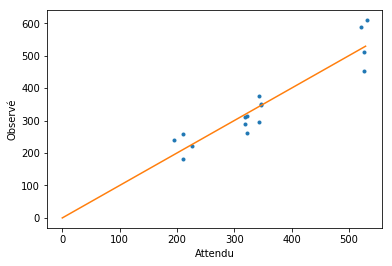

In [147]:
projet.graphe_Attendu_Observe("./sequences/regulatory_seqs_GAL.fasta",2)

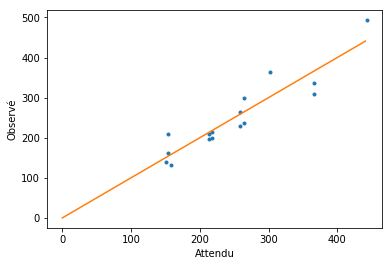

In [148]:
projet.graphe_Attendu_Observe("regulatory_seq_PHO.fasta",2)

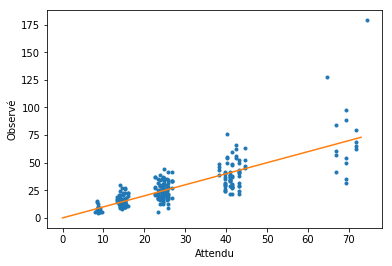

In [149]:
projet.graphe_Attendu_Observe("./sequences/regulatory_seqs_MET.fasta",4)

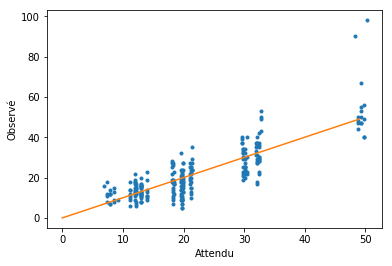

In [150]:
projet.graphe_Attendu_Observe("./sequences/regulatory_seqs_GAL.fasta",4)

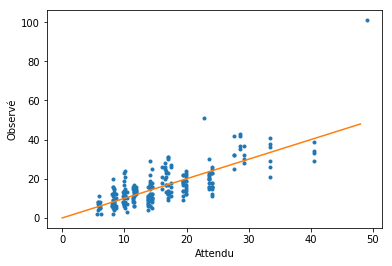

In [151]:
projet.graphe_Attendu_Observe("regulatory_seq_PHO.fasta",4)

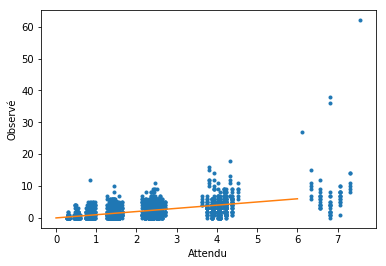

In [154]:
projet.graphe_Attendu_Observe("./sequences/regulatory_seqs_MET.fasta",6)

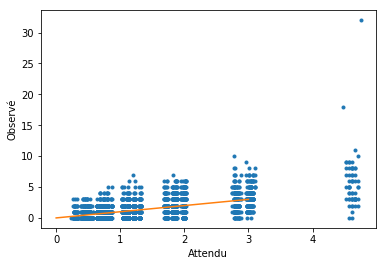

In [153]:
projet.graphe_Attendu_Observe("./sequences/regulatory_seqs_GAL.fasta",6)

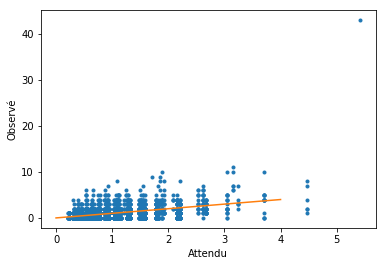

In [152]:
projet.graphe_Attendu_Observe("regulatory_seq_PHO.fasta",6)

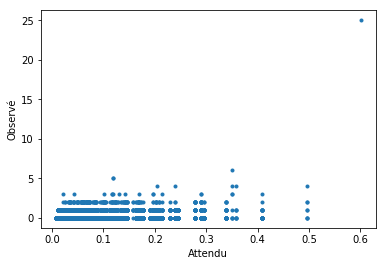

In [193]:
projet.graphe_Attendu_Observe("regulatory_seq_PHO.fasta",8)

Lorsque nous augmentons la taille de k, nous observons que la probabilité d'obtenir un comptage proche de celui observé est plus faible et ceci se fait de manière exponentielle si nous augmentons la taille du mot. En effet, plus le mot est long plus il est difficile de déterminer précisément sa fréquence attendue contrairement à un mot plus petit.

## 3.2 Simulation de séquences aléatoires

On veut évaluer la validité de nos calcul de probabilités empiriques à l’aide de simulations. On va simuler un grand nombre de séquences aléatoire et comparer la probabilité obtenue avec la valeur observée.

### Question 1

Ecrire une fonction `simule_sequence(lg, m)` qui génère une séquence aléatoire de longueur lg d’une composition donnée m (proportion de A, C, G et T). Vous pouvez repartir du code utilisé pendant la première séance de TME.

In [185]:
seq_simule = projet.simule_sequence(4, (0.2,0.3,0.1,0.4))
print(seq_simule)
print(projet.decode_sequence(seq_simule))

[3 1 2 1]
TCGC


### Question 2
Avec la fonction de simulation de séquences, simuler une série de plusieurs séquences (par exemple 1000) pour comparer le comptage attendu et le comptage observé.

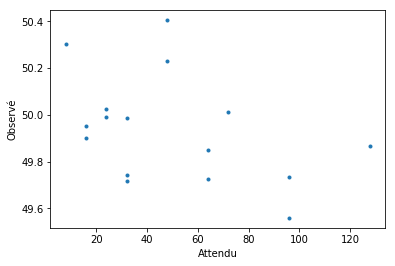

In [163]:
#Génère 1000 séquence et affiche un graphe de points représentant l'occurence moyenne de chaque mot
projet.comparaison_simulation(m,800,2)

### Question 3
On veut maintenant estimer la probabilité d’observer un mot un certain nombre n de fois dans une séquence de longueur l. Utilisez les simulations pour estimer la probabilité empirique des mots ATCTGC, ATATAT, TTTAAA ou AAAAAA. Rappel : la probabilité empirique $p_{emp}(N ≥ n)$ se calcule simplement comme la proportion de simulations où le mot est apparu au moins n fois.

In [201]:
#exemple d'execution
m = (0.25, 0.25, 0.25, 0.25)
l = 800
n = 2
projet.proba_mot_n(n, l, m)
#Ordre des probabilités empiriques
#Pemp(ATCTGC ≥ n) , Pemp(ATATAT ≥ n) , Pemp(TTTAAA ≥ n) , Pemp(AAAAAA ≥ n)

[0.012, 0.027, 0.017, 0.046]

Les mots plus « complexe », c'est à dire avec une suite de nucléotides sans répétition interne (exemple : ATCTGC) ont une probabilité empirique qui sera plus faible qu'un mot contenant des répétitions. Plus il y a de répétitions plus la probabilité empirique sera élevée.

### Question 4
Dessiner des histogrammes de la distribution du comptage des mots. Remarquez vous des différences en fonction du mot? Par exemple ATATAT et TTTAAA ont la même probabilité d’apparaître, ont-ils la même distribution ?

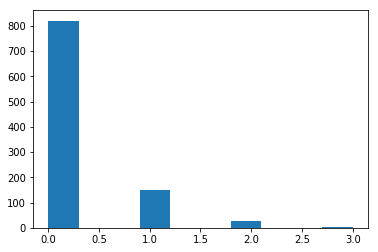

In [203]:
#execution graphe
projet.distribution_comptage_mot(projet.encode_sequence("ATATAT") ,l, m)

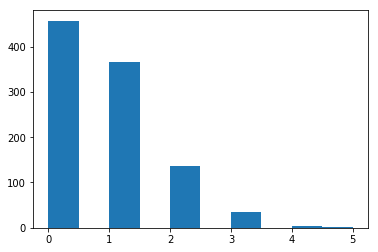

In [174]:
#execution graphe
projet.distribution_comptage_mot(projet.encode_sequence("TTTAAA") ,l, m)

En simulant toujours 1000 séquences, nous remarquons que les mots n’ont pas la même distribution cependant en utilisant la fonction logprobafast qui calcule la log-probabilité d’un mot alors les résultats pour les deux mots sont à peu près semblables. En effet les deux mots possèdent le même nombre de A et de T mais ceux-ci sont distribués différemment dans les deux mots. Nous remarquons que pour le mot ATATAT, le nombre de fois que le mot apparaît avec une occurrence de 1 varie fortement, nous ne pouvons rien déduire de cela, en effet la probabilité que le mot apparaisse une fois dans la séquence est la même peu importe le mot, car nous devons avant tout le construire en entier, ici il faut une suite précise de 6 nucléotides pour former le mot.

Nous observons aussi que pour une occurrence de 2, les deux barres valent approximativement 100 alors que pour une occurrence de 1 le mot ATATAT apparaît moins de fois que le mot TTTAAA, nous expliquons ceci par le fait que si le mot ATATAT est déjà apparu une fois, il suffit que d'une suite de deux nucléotides précis (AT) afin de former un
nouveau mot. Tandis que pour le mot TTTAAA, même si le mot apparaît déjà une fois, il faudra tout de même une suite précise de 6 nucléotides pour former un nouveau mot.

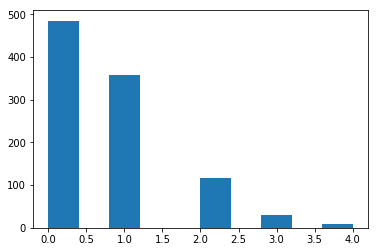

In [172]:
#execution graphe
l = 3000
m = (0.25, 0.25, 0.25, 0.25)
projet.distribution_comptage_mot(projet.encode_sequence("ATCTGC") ,l, m)

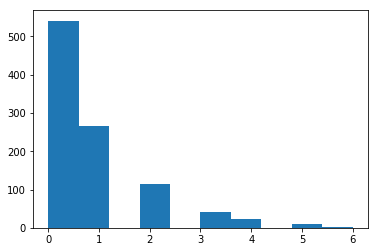

In [171]:
#execution graphe
projet.distribution_comptage_mot(projet.encode_sequence("AAAAAA") ,l, m)

### Question 5
Comment peut-on calculer un intervalle de confiance pour cette probabilité empirique ?

(réponse ici)

## 3.3 Modèles de dinucléotides et trinucléotides

Une des limitations de la méthode proposée précédemment est qu’elle ne peut pas prendre en compte le fait que certaines combinaisons de nucléotides ont plus de chance d’apparaître que d’autres. On peut tenir compte de ces effets en utilisant un modèle de séquence aléatoire qui prend en compte les fréquences de dinucléotides chevauchant.
<br>
En plus de la table des nucléotides, on estime une table à 4 lignes et 4 colonnes M où l’élément M(i, j) est la probabilité de la lettre j sachant qu’on est sur la lettre i. <br>
Avec ce modèle, on génère une séquence de la manière suivante : <br>
• On génère la première lettre suivant la table des fréquences de nucléotides (par exemple G) <br>
• On génère ensuite chaque lettre suivante en fonction de la lettre courante avec la matrice M (par exemple la troisième ligne de M pour la seconde position).

### Question 1
Est ce que ce modèle correspond à une chaîne de Markov ? De quel ordre ? A quoi correspond la probabilité stationnaire ?

Oui , ce modèle correspond à une chaine de Markov d'ordre 1 ( car on se base uniquement sur l'état précédent pour déterminer le suivant ). La probabilité stationnaire est la distribution des probabilités après convergence.

### Question 2
Ecrire une fonction qui estime M à partir des comptages des mots de longueur 2.

In [212]:
#exemple d'execution
m = (0.25, 0.25, 0.25, 0.25)
projet.estimM(2,m)

array([[0.06   , 0.08   , 0.05125, 0.06   ],
       [0.06   , 0.07125, 0.07375, 0.06875],
       [0.06625, 0.06125, 0.06125, 0.04875],
       [0.06625, 0.06   , 0.05125, 0.05875]])

### Question 3
Ecrire une fonction qui simule une séquence de longueur l avec le modèle de dinucléotides.

In [69]:
#exemple d'execution

### Question 4
Calculez la probabilité d’apparition d’un mot à une position donnée (rappel : pour les fréquences de nucléotides, c’est le produit des probabilités des lettres).

### Question 5
Quel est le nombre attendu d’occurrences pour un mot de longueur k avec le modèle de dinucléotides ?

(réponse ici)

### Question 6
Comparez les comptages du nombre d’occurrences entre le modèle de nucléotides et de dinucléotides.

(réponse ici)

### Question 7
En déduire la distribution du nombre d’occurrences quand les mots ne se chevauchent pas, l’appliquer aux séquences de régulation. Est ce que cela marche mieux dans le cas de PHO ?

(réponse ici)

## 3.4 Probabilités de mots

### Question 1

On va calculer une approximation de la probabilité d’avoir un mot w qui apparait n fois dans une séquence aléatoire (0 ≤ n ≤ l−k+1). On regarde ici des mots w qui ne sont pas chevauchant avec eux même (par exemple w=ATCT est ok, mais pas w=CCTCC). On fait l’hypothèse en première approximation que dans ce cas, les différentes positions d’occurrences du mot sont indépendantes et qu’on peut utiliser une loi binomiale pour le comptage. Donnez les paramètres de cette loi binomiale.

Si l’on part du principe que l’on ne regarde pas le chevauchement des mots avec eux même alors il est possible d’utiliser une loi binomiale X pour le comptage d’un mot dans une séquence de longueur l avec comme paramètre $n = l-k+1$ avec k longueur du mot et $p$=(Nombre de fois que le mot apparaît dans la séquence)$/n$. Ainsi, nous pouvons calculer : $P(X=i)= \binom{N}{i} * p^i * (1-p)^{n-i}$

In [181]:
print(projet.boucle_n_Binomiale(1000,3000,(0.3,0.2,0.2,0.3), 6,1))

print(projet.boucle_n_Binomiale_SCIPY(100,3000,(0.3,0.2,0.2,0.3), 6,1))

0.3241223283789295
0.36437525446196434


Nous nous sommes par la suite intéressés à $P(X≥i)$, pour ce faire nous avons écrit une fonction : proba_occ_comptage_Binomiale prenant comme paramètres, une liste des comptages des mots de taille k, et de la longueur de la séquence. Nous avons trouvé des résultats cohérant par rapport aux histogrammes de distribution. Nous avons toutefois remarqué, que pour des mots sans répétitions de taille k=6, le calcul analytique pour P(X≥1) est plus faible que l'observé. Par exemple pour le mot TTTAAA avec un tuple de fréquence (0.3, 0.2, 0.2, 0.3): nous obtenons P(X ≥ 1) = 0,765. Tandis que sur l'histogramme, nous observons P(X ≥ 1) = 0,885.
Mais plus le mot possède de répétitions, plus le calcul analytique se rapproche de l'observé, jusqu'à le dépasser pour des mots tel que AAAAAA, où l'on obtient : P(X≥1)=0,664. Tandis que sur l'histogramme, nous observons P(X≥1)=0,57.

### Question 2
Quelle approximation peut être faite avec une loi de Poisson ?

(réponse ici)

### Question 3
Comparer la distribution de probabilité calculée pour les mots ATCTGC, ATATAT, TTTAAA ou AAAAAA avec l’histogramme de la probabilité empirique. Que remarquez vous ?

(réponse ici)

### Question 4
Ecrire une fonction qui, à partir de la liste des comptages des mots de taille k et de la longueur de la séquence, calcul leur probabilité d’occurrence $P(N_w ≥ n_w)$ avec la formule analytique.

(réponse ici)

### Question 5
Pour l’exemple de PHO, donnez les mots qui apparaissent significativement plus qu’attendu pour k = 2,4,6. Arrivez vous à reconstruire les séquences des sites de fixation ?

(réponse ici)